# Assignment 2

Pada tugas ini, digunakan dataset NYC Property Sales yang berisi data tentang penjualan properti di New York City (NYC). Dataset ini dikumpulkan oleh Departemen Pajak dan Keuangan NYC sebagai bagian dari program Open Data NYC, yang bertujuan untuk meningkatkan transparansi dan akuntabilitas pemerintah kota. Data ini diperbarui setiap bulan dan mencakup penjualan properti yang terjadi selama 12 bulan terakhir. Dataset ini terdiri dari beberapa variabel, yaitu:

1. Unnamed: Variabel ini tidak memberikan informasi penting dalam dataset dan hanya merupakan satu kolom tanpa nama.
2. Borough: Merupakan distrik atau wilayah di NYC tempat properti terletak.
3. Neighborhood: Nama lingkungan atau daerah di mana properti terletak.
4. Building Class Category: Kategori kelas bangunan properti seperti apartemen, gedung perkantoran, dan toko.
5. Tax Class At Present: Kategori pajak properti saat ini seperti pajak perumahan dan pajak komersial.
6. Block: Nomor blok tempat properti berada.
7. Lot: Nomor lot atau nomor unit properti tersebut.
8. Easement: Informasi tentang adanya hak penggunaan properti oleh pihak ketiga.
9. Building Class At Present: Kategori kelas bangunan properti saat ini.
10. Address: Alamat lengkap properti.
11. Apartment Number: Nomor unit properti jika ada.
12. Zip Code: Kode pos alamat properti.
13. Residential Units: Jumlah unit tempat tinggal di dalam properti.
14. Commercial Units: Jumlah unit komersial di dalam properti.
15. Total Units: Total jumlah unit di dalam properti.
16. Land Square Feet: Luas tanah properti dalam kaki persegi.
17. Gross Square Feet: Luas total bangunan dalam kaki persegi.
18. Year Built: Tahun bangunan dibangun.
19. Tax Class At Time Of Sale: Kategori pajak properti pada saat penjualan.
20. Building Class At Time Of Sale: Kategori kelas bangunan pada saat penjualan.
21. Sale Price: Harga jual properti.
22. Sale Date: Tanggal penjualan properti.

### Import Library

Berikut library yang akan diimport sesuai kebutuhan

In [99]:
import numpy as np
import scipy.stats
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

### Read Data Set

Membaca data set menggunakan library pandas

In [100]:
nyc = pd.read_csv('nyc-rolling-sales.csv')

### Menampilkan head dan tail

Menampilkan beberapa data teratas dan terbawah menurut tabel

In [101]:
# Untuk menampilkan semua kolom pada tabel
pd.set_option('display.max_columns',None)

In [102]:
nyc.head(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


In [103]:
nyc.tail(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


### Menghapus kolom yang tidak diperlukan
Saya menghapus tiga kolom yaitu 'Unnamed: 0','EASE-MENT','APARTMENT NUMBER'.

In [104]:
nyc.drop(columns=['Unnamed: 0','EASE-MENT','APARTMENT NUMBER'], axis=1, inplace=True)

### Mengecek nilai Null

In [105]:
nyc.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Untuk sementara waktu tidak ditemukan nya nilai Null tetapi bisa kita cek kembali nilai null yang digantikan dengan nilai lain.

In [106]:
df_nyc = nyc[['BOROUGH', 'TOTAL UNITS', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'SALE PRICE', 'LOT']]

df_nyc.head()

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,LOT
0,1,5,1900,2,6625000,6
1,1,31,1900,2,-,26
2,1,17,1900,2,-,39
3,1,10,1913,2,3936272,21
4,1,6,1900,2,8000000,55


Di codingan diatas saya mengambil 6 kolom yang kemungkinan memiliki hubungan antar kolom dan disimpan di variabel df_nyc

### Menentukan nilai selain Null

Disini saya menggunakan if pada percobaan disemua kolom diawali dari kolom Borough sampai kolom Lot untuk menentukan nilai selain Nan, untuk direplace menjadi nilai nan agar tidak adanya missing value atau data yang hilang atau nilai yang berbeda

In [107]:
index = 0 
for row in df_nyc['BOROUGH']:
    try:
        float(row)
        pass
    except ValueError:
        df_nyc.loc[index, 'BOROUGH'] = np.nan
    index += 1

df_nyc.head(10)

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,LOT
0,1,5,1900,2,6625000,6
1,1,31,1900,2,-,26
2,1,17,1900,2,-,39
3,1,10,1913,2,3936272,21
4,1,6,1900,2,8000000,55
5,1,20,1900,2,-,16
6,1,8,1920,2,3192840,32
7,1,46,1900,2,-,18
8,1,15,1920,2,-,34
9,1,24,1920,2,16232000,153


In [108]:
index = 0 
for row in df_nyc['TOTAL UNITS']:
    try:
        float(row)
        pass
    except ValueError:
        df_nyc.loc[index, 'TOTAL UNITS'] = np.nan
    index += 1

df_nyc.head(10)

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,LOT
0,1,5,1900,2,6625000,6
1,1,31,1900,2,-,26
2,1,17,1900,2,-,39
3,1,10,1913,2,3936272,21
4,1,6,1900,2,8000000,55
5,1,20,1900,2,-,16
6,1,8,1920,2,3192840,32
7,1,46,1900,2,-,18
8,1,15,1920,2,-,34
9,1,24,1920,2,16232000,153


In [109]:
index = 0 
for row in df_nyc['YEAR BUILT']:
    try:
        float(row)
        pass
    except ValueError:
        df_nyc.loc[index, 'YEAR BUILT'] = np.nan
    index += 1

df_nyc.head(10)

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,LOT
0,1,5,1900,2,6625000,6
1,1,31,1900,2,-,26
2,1,17,1900,2,-,39
3,1,10,1913,2,3936272,21
4,1,6,1900,2,8000000,55
5,1,20,1900,2,-,16
6,1,8,1920,2,3192840,32
7,1,46,1900,2,-,18
8,1,15,1920,2,-,34
9,1,24,1920,2,16232000,153


In [110]:
index = 0 
for row in df_nyc['TAX CLASS AT TIME OF SALE']:
    try:
        float(row)
        pass
    except ValueError:
        df_nyc.loc[index, 'TAX CLASS AT TIME OF SALE'] = np.nan
    index += 1

df_nyc.head(10)

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,LOT
0,1,5,1900,2,6625000,6
1,1,31,1900,2,-,26
2,1,17,1900,2,-,39
3,1,10,1913,2,3936272,21
4,1,6,1900,2,8000000,55
5,1,20,1900,2,-,16
6,1,8,1920,2,3192840,32
7,1,46,1900,2,-,18
8,1,15,1920,2,-,34
9,1,24,1920,2,16232000,153


In [111]:
index = 0 
for row in df_nyc['SALE PRICE']:
    try:
        float(row)
        pass
    except ValueError:
        df_nyc.loc[index, 'SALE PRICE'] = np.nan
    index += 1

df_nyc.head(10)

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,LOT
0,1,5,1900,2,6625000,6
1,1,31,1900,2,NaN,26
2,1,17,1900,2,NaN,39
3,1,10,1913,2,3936272,21
4,1,6,1900,2,8000000,55
5,1,20,1900,2,NaN,16
6,1,8,1920,2,3192840,32
7,1,46,1900,2,NaN,18
8,1,15,1920,2,NaN,34
9,1,24,1920,2,16232000,153


In [112]:
index = 0 
for row in df_nyc['LOT']:
    try:
        float(row)
        pass
    except ValueError:
        df_nyc.loc[index, 'LOT'] = np.nan
    index += 1

df_nyc.head(10)

,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,LOT
0,1,5,1900,2,6625000,6
1,1,31,1900,2,NaN,26
2,1,17,1900,2,NaN,39
3,1,10,1913,2,3936272,21
4,1,6,1900,2,8000000,55
5,1,20,1900,2,NaN,16
6,1,8,1920,2,3192840,32
7,1,46,1900,2,NaN,18
8,1,15,1920,2,NaN,34
9,1,24,1920,2,16232000,153


### Menampilkan Nilai Null
Setelah di cek missing value, melakukan cek kembali pada masing masing kolom untuk melihat nilai null

In [113]:
df_nyc.isnull().sum()

BOROUGH                          0
TOTAL UNITS                      0
YEAR BUILT                       0
TAX CLASS AT TIME OF SALE        0
SALE PRICE                   14561
LOT                              0
dtype: int64

hanya sale price yang memiliki nilai null sebanyak 14561 baris.

### Menghapus Nilai Null

In [114]:
df_nyc.dropna(axis=0, inplace=True)
df_nyc.head(3)

C:\Users\Fadli Putra\AppData\Local\Temp\ipykernel_1840\3256827233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyc.dropna(axis=0, inplace=True)


,BOROUGH,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,LOT
0,1,5,1900,2,6625000,6
3,1,10,1913,2,3936272,21
4,1,6,1900,2,8000000,55


Setelah menghapus nilai null, re-check kembali informasi datanya

In [115]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 84547
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    69987 non-null  int64 
 1   TOTAL UNITS                69987 non-null  int64 
 2   YEAR BUILT                 69987 non-null  int64 
 3   TAX CLASS AT TIME OF SALE  69987 non-null  int64 
 4   SALE PRICE                 69987 non-null  object
 5   LOT                        69987 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 3.7+ MB


### Measure of Central Tendency : Mean

Mencari Mean menggunakan library scipy pada kolom 'TOTAL UNITS'

In [116]:
pd.Series(df_nyc['TOTAL UNITS']).mean()

2.092202837669853

Mencari Mean menggunakan library Numpy pada kolom 'BOROUGH'

In [117]:
np.mean(df_nyc['BOROUGH'])

2.9219283581236515

Mencari Mean menggunakan library Scipy pada kolom 'TIME CLASS AT TIME OF SALE'

In [118]:
scipy.mean(df_nyc['TAX CLASS AT TIME OF SALE'])

C:\Users\Fadli Putra\AppData\Local\Temp\ipykernel_1840\1322678403.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  scipy.mean(df_nyc['TAX CLASS AT TIME OF SALE'])


1.641976367039593

### Measure of Central Tendency : Median

Mencari Median menggunakan library Pandas pada kolom 'YEAR BUILT'

In [119]:
pd.Series(df_nyc['YEAR BUILT']).median()

1937.0

Mencari Median menggunakan library Scipy pada kolom 'TOTAL UNITS'

In [120]:
np.median(df_nyc['TOTAL UNITS'])

1.0

Mencari Median menggunakan library Scipy pada kolom 'TIME CLASS AT TIME OF SALE'

In [121]:
scipy.median(df_nyc['TAX CLASS AT TIME OF SALE'])

C:\Users\Fadli Putra\AppData\Local\Temp\ipykernel_1840\52580768.py:1: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  scipy.median(df_nyc['TAX CLASS AT TIME OF SALE'])


2.0

### Measure of Central Tendency : Modus

Mencari Modus menggunakan library Pandas pada kolom 'BOROUGH'

In [122]:
pd.Series(df_nyc['BOROUGH']).mode()

0    3
Name: BOROUGH, dtype: int64

Mencari Modus menggunakan library Scipy pada kolom 'YEAR BUILT' dengan output berupa urutan index

In [123]:
scipy.stats.mode(df_nyc['YEAR BUILT'])

C:\Users\Fadli Putra\AppData\Local\Temp\ipykernel_1840\4272022224.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  scipy.stats.mode(df_nyc['YEAR BUILT'])


ModeResult(mode=array([0], dtype=int64), count=array([5391]))

### Measure of Spread: Range

Variabel df_nycRange adalah penampung data dalam bentuk array untuk kolom YEAR BUILT untuk mempermudah menghitung Range

In [124]:
df_nycRange = df_nyc['YEAR BUILT'].to_numpy()

Berikut tampilan datanya

In [125]:
df_nycRange

array([1900, 1913, 1900, ..., 1925, 2001, 2006], dtype=int64)

Menentukan nilai Minimum

In [126]:
np.amin(df_nycRange)

0

Menentukan nilai Maximum

In [127]:
np.amax(df_nycRange)

2017

Menentukan range kedua nilai maximum dan minimum

In [128]:
np.amax(df_nycRange) - np.amin(df_nycRange)

2017

### Measure of Spread: Variance

In [129]:
df_nycVar = df_nyc['LOT'].astype('int64')

In [130]:
df_nycVar

0          6
3         21
4         55
6         32
9        153
        ... 
84543     34
84544     78
84545     60
84546     28
84547    679
Name: LOT, Length: 69987, dtype: int64

In [131]:
pd.Series(df_nycVar).var()

430462.65340271476

Dari hasil tersebut dijelaskan bahwa nilai variance dari kolom LOT adalah 430462. Dimana variance merupakan penyebaran data dan seberapa jauh titik data dari Mean.

### Measure of Spread: Standard Deviation

np.std adalah sebuah fungsi dari library Numpy. Dimana untuk mengukur persebaran data dari mean.

Ouput dari data TAX CLASS AT TIME OF SALE adalah 0.7 dimana nilai rata rata tersebut cukup baik.

In [132]:
np.std(df_nyc['TAX CLASS AT TIME OF SALE'], ddof=1)

0.7711617163591019

Perhitungan Standard Deviation menggunakan library Pandas

In [133]:
df_nyc['TAX CLASS AT TIME OF SALE'].std()

0.7711617163591019

### Probability Distribution

Pada Distribusi tersebut, digunakan variabel baru df_nycSale untuk mengganti type data int64 agar bisa dihitung

In [134]:
df_nycSale = df_nyc['SALE PRICE'].astype('int64')
df_nycSale

0         6625000
3         3936272
4         8000000
6         3192840
9        16232000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 69987, dtype: int64

Pada code dibawah, membangun grafik data menggunakan histogram. lalu ada perhitungan menggunakan skew.

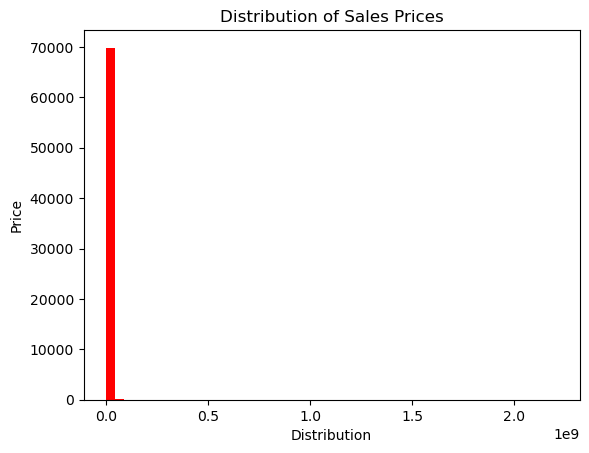

In [135]:
skew = df_nycSale.skew()

plt.hist(df_nycSale,
         bins=50,
         color="red")
plt.title('Distribution of Sales Prices')
plt.xlabel('Distribution')
plt.ylabel('Price')

plt.show()

Data tersebut sangat kontras pada kiri grafik dimana lonjakan tinggi daripada distributionnya

C:\Users\Fadli Putra\AppData\Local\Temp\ipykernel_1840\652429789.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_nycSale)


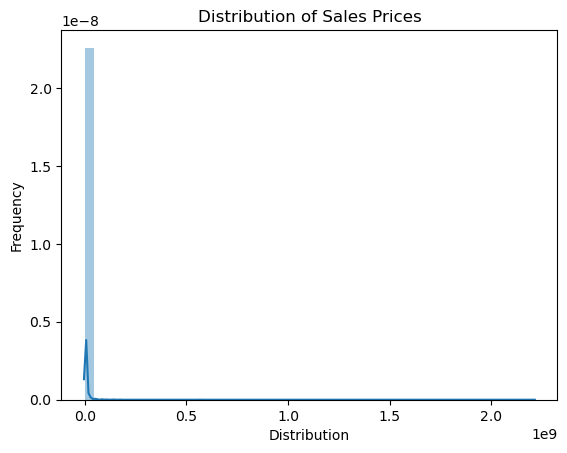

In [136]:
sns.distplot(df_nycSale)
plt.title('Distribution of Sales Prices')
plt.xlabel('Distribution')
plt.ylabel('Frequency')
plt.show()

Library seaborn menampilkan kepadatan data pada data sebelummnya dengan kombinasi lonjakan garis yang lonjakan dikiri dan panjang kekanan. Bisa ditarik kesimpulan bahwa data SALE PRICE adalah distribusi tidak normal

In [137]:
df_nycLot = df_nyc['LOT'].astype('int64')
df_nycLot

0          6
3         21
4         55
6         32
9        153
        ... 
84543     34
84544     78
84545     60
84546     28
84547    679
Name: LOT, Length: 69987, dtype: int64

Pada Distribusi tersebut, digunakan variabel baru df_nycLot untuk mengganti type data int64 agar bisa dihitung

C:\Users\Fadli Putra\AppData\Local\Temp\ipykernel_1840\2848801821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_nycLot)


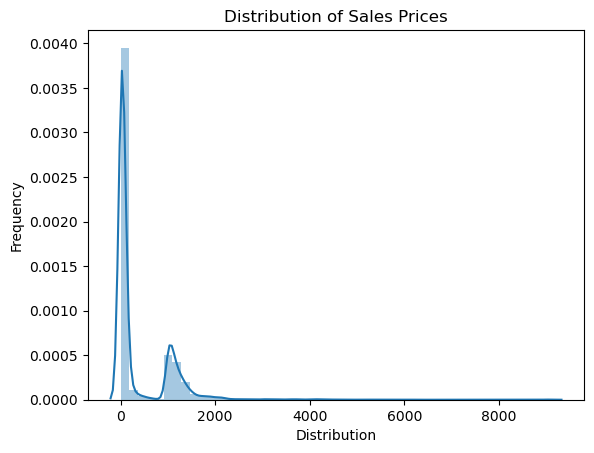

In [138]:
sns.distplot(df_nycLot)
plt.title('Distribution of Sales Prices')
plt.xlabel('Distribution')
plt.ylabel('Frequency')
plt.show()

Library seaborn menampilkan kepadatan data pada data sebelummnya dengan kombinasi dua lonjakan garis yang lonjakan sebelah kiri dan kanan yang garis sisa lebih panjang kekanan. Bisa ditarik kesimpulan bahwa data LOT juga distribusi tidak normal

### Confidence Intervals

Pada kolom BOROUGH dilakukan pengelompokan dengan kolom tahun pembuatan property.
Berikut penjelasan angka dari kolom BOROUGH:
1. Manhattan = 1
2. Bronx = 2
3. Booklyn = 3
4. Queens = 4
5. Staten Island

*Data tersebut merupakan re-search dari kaggle

In [139]:
df_nyc.groupby(['BOROUGH', 'YEAR BUILT'])[['YEAR BUILT']].count()

YEAR BUILT
BOROUGH YEAR BUILT            
1       0                 1594
        1111                 1
        1800                 1
        1846                 1
        1850                 5
...                        ...
5       2012                15
        2013                 8
        2014                29
        2015               186
        2016               203

[615 rows x 1 columns]

Value counts (2012-2016)

In [140]:
value = 15+8+29+186+203
value

441

Mencari std error menggunakan rumus:

In [141]:
propor = 203/value
print(value)
print(propor)

441
0.4603174603174603


In [142]:
stderror = (propor*(1-propor)/value)**(1/2)
stderror

0.023734419452921516

pada Rumus tersebut terdapat hasil std error 0.023

Menentukan nilai lower dan upper dengan z_score

In [143]:
z_score = 1.96

low = propor - (z_score*stderror)
up = propor + (z_score*stderror)

print('lower',low)
print('upper',up)

lower 0.4137979981897341
upper 0.5068369224451864


Z-score yang lebih besar dari 1.96 atau lebih kecil dari -1.96 pada distribusi normal standar menunjukkan bahwa suatu nilai memiliki signifikansi yang tinggi.

In [144]:
print('Margin Error\n',(z_score*stderror))

Margin Error
 0.04651946212772617


Margin of error adalah ukuran yang menunjukkan seberapa akurat sampel dalam merepresentasikan populasi tertentu. Dalam kasus ini, margin of error yang diperoleh dari data adalah 0,0465. Semakin rendah nilai margin of error, semakin besar tingkat kepercayaan pada hasil yang dihasilkan, dan sebaliknya.

### HYPOTHESIS TESTING

In [145]:
df_nyc['TAX CLASS AT TIME OF SALE'].nunique()

4

In [146]:
df_nyc['TAX CLASS AT TIME OF SALE'].unique()

array([2, 4, 1, 3], dtype=int64)

Pada kolom TAX CLASS AT TIME OF SALE memiliki 4 nilai unik dimana berikut penjelasan masing masing angka pada kolom TAX CLASS AT TIME OF SALE:

1. 1 = 1 Properti
2. 2 = Lebih dari 1 properti
3. 3 = Properti bisnis
4. 4 = Properti unik

*Data tersebut merupakan re-search dari kaggle

### Hipotesis

Dalam uji ini, menguji apakah rata-rata harga jual (SALE PRICE) properti dengan tingkat pajak unik (Tax 3) lebih tinggi daripada rata-rata harga jual properti dengan tingkat pajak banyak (Tax 2).

* n1: Rata-rata SALE PRICE properti dengan tingkat pajak unik (Tax 3) tidak lebih tinggi daripada rata-rata SALE PRICE properti dengan tingkat pajak banyak (Tax 2).

* n0: Rata-rata SALE PRICE properti dengan tingkat pajak unik (Tax 3) lebih tinggi daripada rata-rata SALE PRICE properti dengan tingkat pajak banyak (Tax 2).


Menggunakan one-tailed test karena n1 adalah rata-rata SALE PRICE untuk Tax 3 lebih tinggi dari Tax 2. Untuk memperjelas, dapat dituliskan:

* n0: mean_tax3 - mean_tax2 <= 0
* n1: mean_tax3 - mean_tax2 > 0

In [147]:
tax3 = df_nyc[df_nyc['TAX CLASS AT TIME OF SALE']==3]
tax2 = df_nyc[df_nyc['TAX CLASS AT TIME OF SALE']==2]

In [148]:
v_tax3 = len(tax3)
mean_tax3 = tax3['SALE PRICE'].astype('float64').mean()
std_tax3 = tax3['SALE PRICE'].astype('float64').std()
print(v_tax3)
print(mean_tax3)
print(std_tax3)

2
0.0
0.0


In [149]:
v_tax2 = len(tax2)
mean_tax2 = tax2['SALE PRICE'].astype('float64').mean()
std_tax2 = tax2['SALE PRICE'].astype('float64').std()
print(v_tax2)
print(mean_tax2)
print(std_tax2)

32161
1474632.8838033644
5365669.501966393


Confidence level = 95%

In [150]:
alpha = 0.05

In [151]:
hipotesis_tax = sm.stats.ztest(tax3['SALE PRICE'].astype('float64').dropna(),tax2['SALE PRICE'].astype('float64').dropna(),alternative='larger')
hipotesis_tax

(-0.3886585641989188, 0.6512356309752758)

In [152]:
if hipotesis_tax[1]>alpha:
    print('confirm n0 : rata-rata SALE PRICE untuk Tax 3 tidak lebih tinggi daripada Tax 2')
else:
    print('not accepted n0 : rata-rata SALE PRICE untuk Tax 3 lebih tinggi daripada Tax 2')

confirm n0 : rata-rata SALE PRICE untuk Tax 3 tidak lebih tinggi daripada Tax 2


### Kesimpulan
* Hasil hipotesis harga jual properti untuk tingkat pajak properti unik (Tax 3) tidak lebih tinggi daripada tingkat pajak banyak properti (Tax 2). 
* lalu, Tarif pajak properti yang dikenakan pada saat penjualan TAX CLASS AT TIME OF SALE dapat mempengaruhi harga jual properti SALE PRICE karena pajak yang lebih tinggi dapat mempengaruhi harga dari penjual property.